# Forecasting with pandas
`pandas` is an open-source library for Python that provides high-performance and easy-to-use data structures. `pandas` is widely used in finance and economics because of its time series data analysis capabilities. It also has functunality for reading from and writing to different commonly used file formats, reshaping and pivoting of data sets as well as data splicing, merging and joining. The name "pandas" stems from "panel data", an econometrics term for multidimensional, structured data sets. Moreover, a `pandas` spin-off called `pandas-datareader` allows one to easily import data from online servers. This includes, but is not limitied to, stock information from Yahoo! and Google, economic indicators from the World Bank and statistics from OECD and Eurostat.

## Pandas datastructures
The pandas library makes use of some special data structures: `Series` and `DataFrame`. We will have a quick look at them now. First we need to import the necessities

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

`Series` is a one-dimensional labeled array capable of holding any data type. The axis lables are collectively reffered to as the **index**. Now to construct a `Series` filled with random numbers and index them with letters.

In [32]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    0.764354
b   -0.634983
c   -0.909644
d    0.214165
e   -1.177269
dtype: float64

If you do not provide an index for the `Series`, it will be numeric by default. Numerous operations can be applied the `Series` data structure.

In [33]:
# Setting a new value with index "f"
s['f'] = 2

# Setting a new value with index "something"
s['something'] = 42

# Displaying everything larger than 0.5
s[s > 0.5]

a             0.764354
f             2.000000
something    42.000000
dtype: float64

In [34]:
# Descriptive statistics
s.describe()

count     7.000000
mean      6.036661
std      15.896319
min      -1.177269
25%      -0.772313
50%       0.214165
75%       1.382177
max      42.000000
dtype: float64

### DataFrame
`DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. One can think of it like a spreadsheet or SQL table. Here is an example where we put a 6x4 `numpy` array into a `DataFrame` and indexed it with dates from a `DatetimeIndex` object

In [35]:
# Constructing DateTimeIndex object for lates use
dates = pd.date_range('20170101', periods=6)

# What is this?
dates

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq='D')

In [36]:
# Constructing DataFrame
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

# Showing
df

,A,B,C,D
2017-01-01,-0.401012,0.711385,-1.159317,0.661198
2017-01-02,-0.533830,-0.224962,0.986778,-0.468163
2017-01-03,-0.071304,0.140009,0.799743,0.408779
2017-01-04,-0.750280,-0.181072,-1.088574,-0.389319
2017-01-05,-0.197753,0.059185,-0.271124,-0.273212
2017-01-06,0.379496,-0.989180,-0.298967,0.503902


In [37]:
# Show statistic summary of data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.262447,-0.080773,-0.171910,0.073864
std,0.395889,0.557118,0.908615,0.504154
min,-0.750280,-0.989180,-1.159317,-0.468163
25%,-0.500626,-0.213990,-0.891173,-0.360292
50%,-0.299383,-0.060944,-0.285045,0.067783
75%,-0.102917,0.119803,0.532027,0.480122
max,0.379496,0.711385,0.986778,0.661198


In [38]:
# Sorting by value
df.sort_values(by='B')

,A,B,C,D
2017-01-06,0.379496,-0.989180,-0.298967,0.503902
2017-01-02,-0.533830,-0.224962,0.986778,-0.468163
2017-01-04,-0.750280,-0.181072,-1.088574,-0.389319
2017-01-05,-0.197753,0.059185,-0.271124,-0.273212
2017-01-03,-0.071304,0.140009,0.799743,0.408779
2017-01-01,-0.401012,0.711385,-1.159317,0.661198


In [39]:
# Label slicing
df.loc['20170102':'20170104', ['B','D']]

,B,D
2017-01-02,-0.224962,-0.468163
2017-01-03,0.140009,0.408779
2017-01-04,-0.181072,-0.389319


## Importing Stock Data with pandas-datareader
`pandas-datareader` enables one to import data from online databases such as Yahoo! Finance, Google Finace, Quandl, FRED, OECD and the World Bank. Functions from `pandas_datareader.data` and `pandas_datareader.wb` extract the data from the various Internet source into a pandas `DataFrame`. As an intro to this very powerful tool, let us get historical stock prices from Yahoo! Finance. 

In [40]:
import pandas_datareader.data as web
import datetime

# Start and end date for data import.
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2016, 12, 31)

# Importing data. 
# First and second argument is stock ticker and source respectively
american_airlines = web.DataReader("AAL", 'google', start_date, end_date)

# Showing data from a particular day
print("American Airlines")
american_airlines.loc['20161004']

American Airlines


Open           38.39
High           38.78
Low            37.55
Close          37.63
Volume    9065626.00
Name: 2016-10-04 00:00:00, dtype: float64

The "thing" we have just imported has the added benefit of being a `pandas` `DataFrame` object. As one can clearly see, we have five different values for each index, which is the date; Open, High, Low, Close and Volume. "Open" is the price of the stock at the start of the day when the stock markets opens, "High" and "Low" are the highest and lowest price of the stock during the day, "Close" is the price of the stock as the market closes and "Volume" is the number of stocks that has been trading during the day. 

In [41]:
# Getting descriptive statistics of closing prices
american_airlines.loc[:,'Close'].describe()

count    252.000000
mean      38.183810
std        5.045975
min       25.270000
25%       34.960000
50%       38.275000
75%       41.027500
max       49.640000
Name: Close, dtype: float64

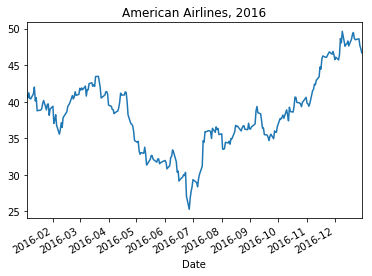

In [42]:
# Plotting closing prices
american_airlines.loc[:,'Close'].plot()
plt.title("American Airlines, 2016")
plt.show()

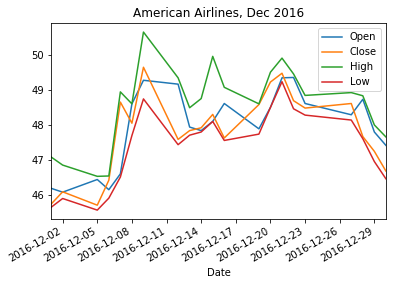

In [43]:
# Plotting close, high and low for December 2016
american_airlines.loc['20161201':'20161231',['Open', 'Close', 'High', 'Low']].plot()
plt.title("American Airlines, Dec 2016")
plt.show()

This plot shows the opening and closing price of the stock, as well as the highest and lowest price during the day, for American airways in December of 2016. This plot is very messy, which why a "candlestick" plot is very common when plotting historical stock prices. This can be a bit tricky, as there is no built-in function in `pandas`, but is definitely possible. One must convert the dates to float values instead and use `matplotlib`.

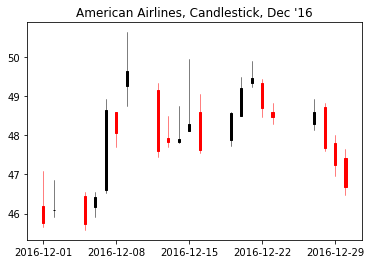

In [44]:
# Importing
from matplotlib.finance import candlestick_ohlc
from matplotlib import dates as mdates

# Creating new DataFrame for plotting Open, High, Low, Close candlesticks
aal_ohlc = american_airlines['20161201':'20161231'].reset_index()

# Removing volume column
aal_ohlc.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

# Converting dates column to float values
aal_ohlc['Date'] = aal_ohlc['Date'].map(mdates.date2num)

# Creating something to plot on
fig, ax = plt.subplots()

# Configuring x-axis to show dates
ax.xaxis_date()

# Plotting
candlestick_ohlc(ax, aal_ohlc.values)
plt.title("American Airlines, Candlestick, Dec '16")

plt.show()

This chart gives the same information to the analyst than as the one above. Each day is represented by a candlestick with a thick center (wax) and thin lines (wick) at the top and/or bottom. They also come in different colours; in this case they are red and black, but they may also be red and green, black and white or something else. A red candlestick, in this case, indicates that the stock has depreciated during the day (fallen), and a black candlestick indicates that the stock has appreciated (risen). The "wax" of the candlestick gives the opening and closing price of the stock. If the stock has the apprecieated the opening price is at the bottom of the wax and closing price on top. Vice versa for a depreciated stock; opening price on top of the wax and closing at the bottom. The ends of the "wicks" of the candlessticks indicates the highes and lowest stock price during intraday trading. This kind of chart may seem a bit strange the first time you see it, but one quickly becomes accustomed to it and realises the ease of used compared to the more traditional line plot above.

## Forecasting a Stock Price with Statsmodels
Forecasting a stock price holds a certain appeal. If one is able to do so accurately, one has a path towards quick and easy riches. Regrettably, many have tried and failed to "crack the code" at the stock market. Nevertheless, the venture has its appeal and we will have a stab at it here.

We shall try to forecast the stock price of American Airlines by an ordinary least squares regression, employing the `statsmodels` module for Python. `statsmodels` provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. The package is open source under a [BSD](https://en.wikipedia.org/wiki/BSD_licenses#3-clause_license_.28.22BSD_License_2.0.22.2C_.22Revised_BSD_License.22.2C_.22New_BSD_License.22.2C_or_.22Modified_BSD_License.22.29) license. Moreover, `statsmodels` works very well with `numpy`, `matplotlib` and `pandas`, which is perfect for us

In our task at hand we will first need to consider what factors may reasonably influence the stock price of American Airlines. In other words, what may make investors want to buy or sell the stock, thereby increasing or decreasing demand for it, and in turn making the price go up or down? We will look at several such factors
* **Jet Fuel Prices**: if jet fuel prices increase it is reasonable to assume the the cost of the airline increases, making the stock price go down. It is possible for an airline to hedge against the risk of a possilbe fuel price hike, but we will assume that AA made no such decision. Weekly data is available from Federal Reserve Bank of St. Louis (FRED). The data is for Kerosene-Type Jet Fuel Prices on the US Gulf Coast. We assume that this is representative for the rest of the US jet fuel market.
* **Industrial Prodcution Index**: the Industrial Production Index is an economic indicator that measures real output for all facilities located in the US manufacturing, mining, ellectric and gas utilities. It might be strange to try to forecast the price of airline stock with this indicator. However, the sectors contained in this index are highly sensitive to interest rates and consumer demand. This makes industrial production an important tool for predicting Gross Domestic Product (GDP). The reason for picking industrial production over GDP is because industrial production is reported every month, while GDP is only reported once each quarter. An increasing GDP should have a positive effect on the share price of American Airlines. One would assume that people are travelling more when the economy is booming - either for business or pleasure. The data is available for FRED.
* **Airline Fares**: if the price of airline tickets has gone up overall, one should assume that this translates to higher revenue for AA, and vice versa. Monthly data is available from FRED. The data is the consumer price index (CPI) for airline fares for urban consumers.
* **Number of Passengers Travelled**: when there are more passengers overall one would assume that this translates into more revenue for AA and therefore a higher stock price. Data for montly number of airline passengers on all US and foreign carriers is available from the Bureau of Transportation Statistics through Quandl.

In [45]:
# Importing jet fuel price data from FRED
fuel_price = web.DataReader("WJFUELUSGULF", 'fred', start_date, end_date)

# Importing GDP data from FRED
GDP = web.DataReader("GDP", 'fred', start_date, end_date)

# Importing airline fare CPI from FRED
CPI_airline_fare = web.DataReader("CUSR0000SETG01", 'fred', start_date, end_date)

# Importing number of airline passengers from Quandl
no_passengers = web.DataReader("BTS/AIRPASS", 'quandl', start_date, end_date)

indpro = web.DataReader("INDPRO", 'fred', start_date, end_date) 

We are face with an immediate problem. These `DataFrame` objects have diffenrent lengths! The stock prices are daily (but only business days), fuel prices are weekly and the rest is monthly. This is easy enough to fix, by reindexing all the `DateFrame`s with the same date range and filling in the missing days with the last known value by using the keyword argument `method='ffill'` of the `reindex()` function.

In [46]:
# What are the length of the different DataFrame objects now?
print("Old length of DataFrame objects:")
print(len(american_airlines), len(fuel_price), len(indpro),\
      len(CPI_airline_fare), len(no_passengers))

# Creating date_range object, frequency
dates = pd.date_range(start_date, end_date, freq='D')
dates.name = 'Date'

# Reindexing all DataFrames
american_airlines = american_airlines.reindex(dates, method='ffill')
fuel_price = fuel_price.reindex(dates, method='ffill')
indpro = indpro.reindex(dates, method='ffill')
CPI_airline_fare = CPI_airline_fare.reindex(dates, method='ffill')
no_passengers = no_passengers.reindex(dates, method='ffill')

print("New length of DataFrame objects:")
print(len(american_airlines), len(fuel_price), len(indpro),\
      len(CPI_airline_fare), len(no_passengers))

Old length of DataFrame objects:
252 53 12 12 12
New length of DataFrame objects:
366 366 366 366 366


Plotting the number of passengers gives a good illustration of what we have just done. In the figure below one can clearly see how the monthly data points have been copied to every day in the year.

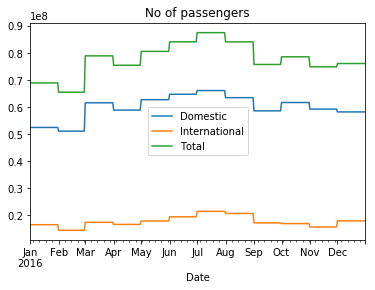

In [47]:
# Plotting no of passengers
no_passengers.plot()
plt.title("No of passengers")
plt.show()

The keen observer may have spotted another potential problem - the year starts on New Years Day, which is a public holiday and the stock market is therefore closed. Will there be stock prices for the first day?

In [48]:
american_airlines['2016-01-01':'2016-01-05']

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN
2016-01-04,41.29,41.35,40.30,40.91,12002531.0
2016-01-05,41.18,41.49,39.95,40.52,10514164.0


This problem needs to be fixed, but the solution is quite easy. The function `fillna()` will fill in the missing `NaN`s.

In [49]:
american_airlines = american_airlines.fillna(method='bfill')
american_airlines['2016-01-01':'2016-01-05']

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-01,41.29,41.35,40.30,40.91,12002531.0
2016-01-02,41.29,41.35,40.30,40.91,12002531.0
2016-01-03,41.29,41.35,40.30,40.91,12002531.0
2016-01-04,41.29,41.35,40.30,40.91,12002531.0
2016-01-05,41.18,41.49,39.95,40.52,10514164.0


Now it is almost time to make our model. First we will construct a new `DataFrame` of all the explanatory variabels.

In [50]:
# Making DataFrame of explanatory variables
expl = pd.concat([fuel_price, indpro, CPI_airline_fare, no_passengers['Total']], axis=1)
expl.describe()

,WJFUELUSGULF,INDPRO,CUSR0000SETG01,Total
count,366.000000,366.000000,366.000000,3.660000e+02
mean,1.243087,103.106227,282.487194,7.763486e+07
std,0.179889,0.315664,6.071190,5.998151e+06
min,0.854000,102.526300,272.241000,6.551834e+07
25%,1.093000,102.889225,276.511750,7.548815e+07
50%,1.307000,103.145900,280.434000,7.860918e+07
75%,1.387000,103.217300,288.306000,8.326352e+07
max,1.539000,103.767500,290.356000,8.755616e+07


Above is describtive statistics of our explanatory variables. We see that the variables are of somewhat different orders of magnitude. We will make adjustments in order to make the coefficients of the final result more easy to compare. The passenger numbers are very large. If we divide by one million the numbers will be in the millions instead. Moreover, we will rename the columns to be more easy to deal with.

In [51]:
# Renaming of columns
expl = expl.rename(columns={"WJFUELUSGULF":"FUEL_PRICE", "CUSR0000SETG01":"CPI",\
                     "Total":"PASSENGERS"})

# Changing order of magnitude
expl.loc[:, 'PASSENGERS'] = expl.loc[:, 'PASSENGERS'] * (1/1000000)

expl.describe()

,FUEL_PRICE,INDPRO,CPI,PASSENGERS
count,366.000000,366.000000,366.000000,366.000000
mean,1.243087,103.106227,282.487194,77.634857
std,0.179889,0.315664,6.071190,5.998151
min,0.854000,102.526300,272.241000,65.518341
25%,1.093000,102.889225,276.511750,75.488154
50%,1.307000,103.145900,280.434000,78.609185
75%,1.387000,103.217300,288.306000,83.263517
max,1.539000,103.767500,290.356000,87.556163


Now we import the `statsmodels.formula.api` namespace which contains the OLS (ordinary least squares) class we will be using. When constructing an instance of the model it is enough to just input the correct columnn from the American Airlines stock price `DataFrame` and the entire explanatory variables `DataFrame` as first and second argument, respectively.

In [52]:
# Importing statsmodels
import statsmodels.formula.api as smf

# Initiating model
model = smf.OLS(american_airlines.loc[:, 'Close'], expl)

# Fitting
res = model.fit()

# Printing summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     9838.
Date:                Mon, 07 Aug 2017   Prob (F-statistic):               0.00
Time:                        12:46:15   Log-Likelihood:                -995.99
No. Observations:                 366   AIC:                             2000.
Df Residuals:                     362   BIC:                             2016.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FUEL_PRICE    -9.3706      2.127     -4.406      0.000     -13.553      -5.188
INDPRO         2.3053      0.157     14.708      0.000       1.997       2.614
CPI           -0.5524      0.052    -10.523      0.000      -0.656      -0.449
PASSENGERS    -0.4099      0.040    -10.290      0.000      -0.488      -0.332
==============================================================================
Omnibus:                       21.505   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.291
Skew:                           0.568   Prob(JB):                     1.44e-05
Kurtosis:                       2.588   Cond. No.                     3.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We are presented with several numbers, but will restrict our focus to a few of them, as a comprenhensive analysis into the validity of this regression is beyond the scope of this text. Firstly, let us look at the coefficitents of the explanatory variables. We see that the fuel price coefficient is negative, as we predicted. As the fuel price rises, the price of the stock falls. The coefficient of the industrial production is positive, which is also according to our reasoning prior to the analysis. The price index for airline tickets has a negative sign. This is not in accordance with our initial thoughts, but may not be entirely illogical. If the prices of airline tickets increase it would be reasonable of consumers to buy less of them, affecting the stock price of American Airlines negatively. The coefficient for the number of passengers is, surprisingly, also negative. This is surpirsing because it implies that when more people travel by air, the stock price of American Airlines goes down. There can be several explanations for this. Any potential increase in passenger numbers may be because of a decrease of ticket prices. While the extra passengers is a good thing, the decreased prices is a bad thing. Moreover, if the number of passengers and the prices of tickets are corrolated in some way, as they reasonable are, it may not be a good idea to include both variables in the regression analysis. 

We will not try to improve the model any further here - econometric is just as much as artform as a science. Trying to work out all the kinks can be a good exercise for a later time. We will, however, try to predict the stock price of American Airlins for the first couple of weeks of 2017, using the model we "trained" on the data from 2016.